In [94]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [95]:
df = pd.read_csv("data.csv")
df.head(5)

,subject ID,labels,0,1,2,3,4,5,6,7,...,672,673,674,675,676,677,678,679,680,681
0,sub_1,normal,640.0,636.0,630.0,656.0,670.0,644.0,660.0,608.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,sub_2,normal,656.0,640.0,648.0,622.0,628.0,644.0,648.0,698.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,sub_3,normal,572.0,564.0,550.0,526.0,524.0,510.0,502.0,496.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,sub_4,normal,298.0,538.0,322.0,532.0,874.0,850.0,824.0,854.0,...,806.0,812.0,814.0,790.0,740.0,716.0,724.0,720.0,710.0,708.0
4,sub_5,normal,630.0,616.0,598.0,638.0,626.0,616.0,594.0,620.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [96]:
data = df.drop(["labels","subject ID"],axis=1)
labels = df["labels"]

In [97]:
data = data.T

In [98]:
data.dropna(how='any',inplace=True,axis=0)

In [99]:
data.shape

(337, 54)

In [100]:
## remove outliers
data=np.where((data.values > 800) | (data.values<600), np.median(data.values), data.values)

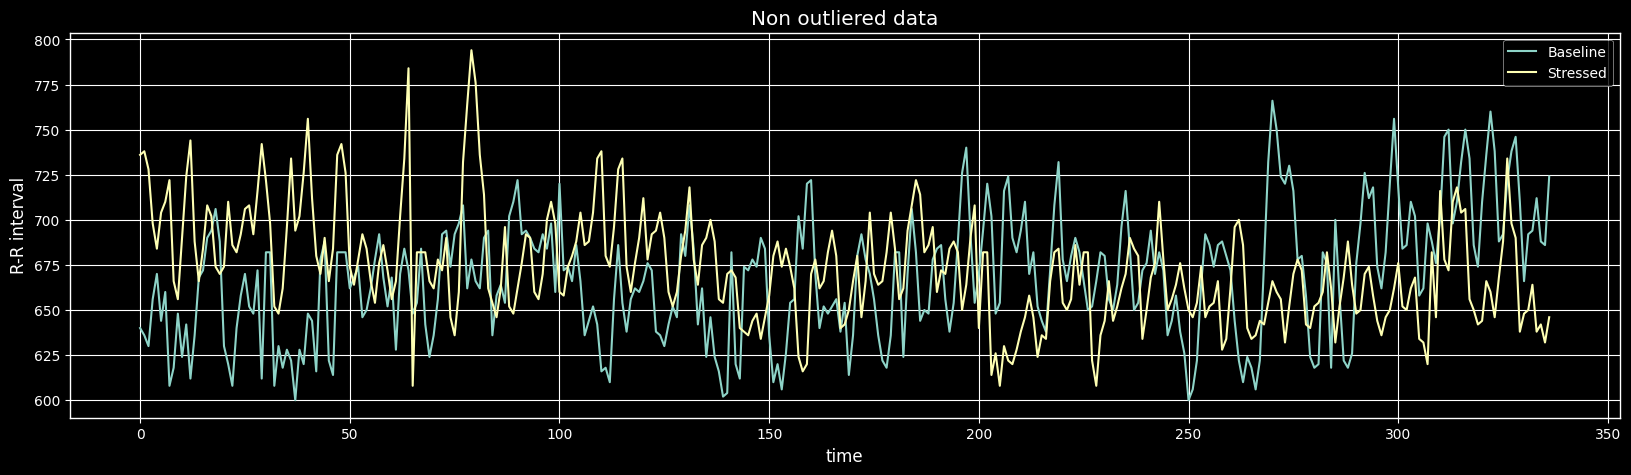

In [101]:
plt.figure(figsize=(20,5))
plt.plot(data[:,0:1],label='Baseline'); #PLOT 
plt.plot(data[:,27:28],label='Stressed');
plt.xlabel('time')

plt.ylabel('R-R interval')
plt.title('Non outliered data')
plt.legend()
plt.show()

In [102]:
from scipy.signal import savgol_filter
data=savgol_filter(data,5,3)

In [103]:
_mean = 0.0
_variance = 0.0

def calc_variance(sig_arc_arr):
    global _mean 
    global _variance

    for x in range(len(sig_arc_arr)):
        _mean += sig_arc_arr[x]
    _mean = _mean / len(sig_arc_arr)

    for x in range(len(sig_arc_arr)):
        _variance = _variance + (sig_arc_arr[x]-_mean)**2
    _variance = _variance / len(sig_arc_arr)
    return _variance

variance = calc_variance(data)
print("Variance is : ",variance)

Variance is :  [1201.10897029 1273.67350347  524.38599131  736.073811    802.24533701
  762.21986539  892.49455091  871.77968314  880.25654802  833.43194166
  900.44196962 1138.67336339  944.07381215  913.08037174  875.46174455
  928.89516529  810.87833838  883.99659692  573.44749932  263.1937245
  469.62977102  717.17904256  849.52226111  737.17188156  709.492148
  855.35284772  710.1462631   644.00077932  589.01568358  360.56218049
  322.59665369  393.34543234  541.4523238   699.95852151  692.37272629
  788.85308922  941.37389814  785.66765589  664.75310433  666.51396076
  988.43909738  651.90617218  463.09648566  650.21304588  794.6621191
  694.08251198  682.16127452  636.43394253  584.8631684   736.85421344
  608.53688753  636.33477693 1529.00334957 2340.51201644]


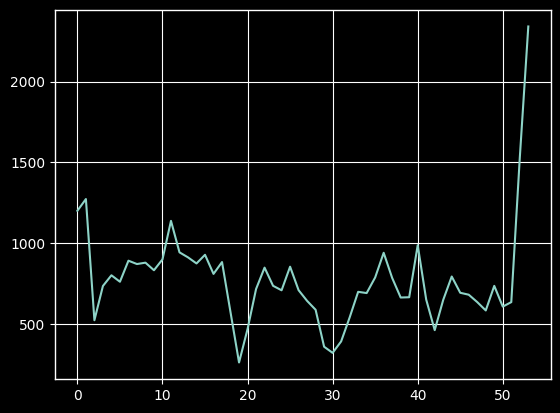

In [104]:
plt.plot(variance)

### **Get means of Each signa point and Plot**

In [105]:
baseline = data[:,:28]
stressed = data[:,29:]

In [106]:
baselineDF = pd.DataFrame(baseline)
stressedDF = pd.DataFrame(stressed)

In [107]:
def get_row_means(df):
    row_means = df.mean(axis=1)
    return row_means.to_numpy()

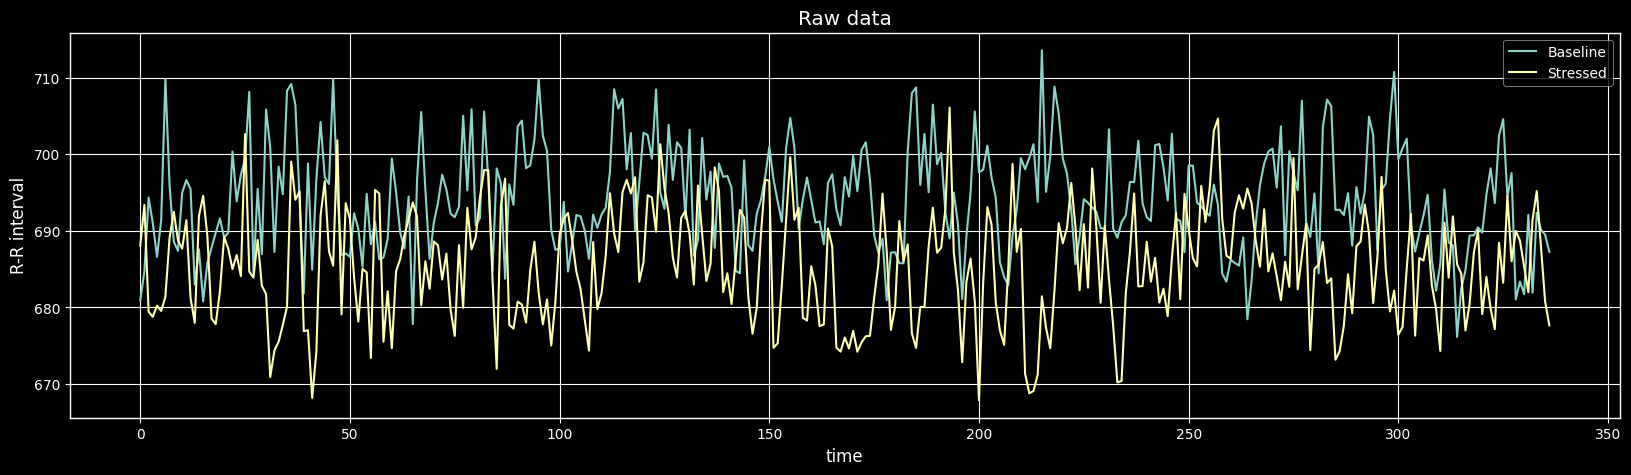

In [108]:
baselinesignal = get_row_means(baselineDF)
stressedsignal = get_row_means(stressedDF)

plt.figure(figsize=(20,5))
plt.plot(baselinesignal,label='Baseline')#PLOT
plt.plot(stressedsignal,label='Stressed')
plt.xlabel('time')
plt.ylabel('R-R interval')
plt.title('Raw data')
plt.legend()
plt.show()

## **Signal Anlaysis**

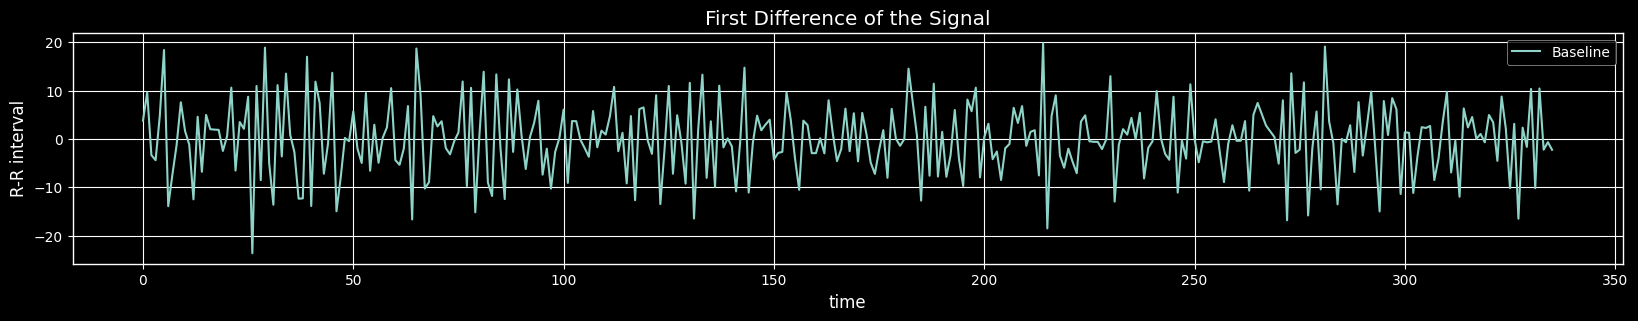

In [109]:
# First Difference of the Signal adjescent points
Diff_baselinesignal = np.diff(baselinesignal)

plt.figure(figsize=(20,3))
plt.plot(Diff_baselinesignal,label='Baseline')
plt.xlabel('time')
plt.ylabel('R-R interval')
plt.title('First Difference of the Signal')
plt.legend()
plt.show()

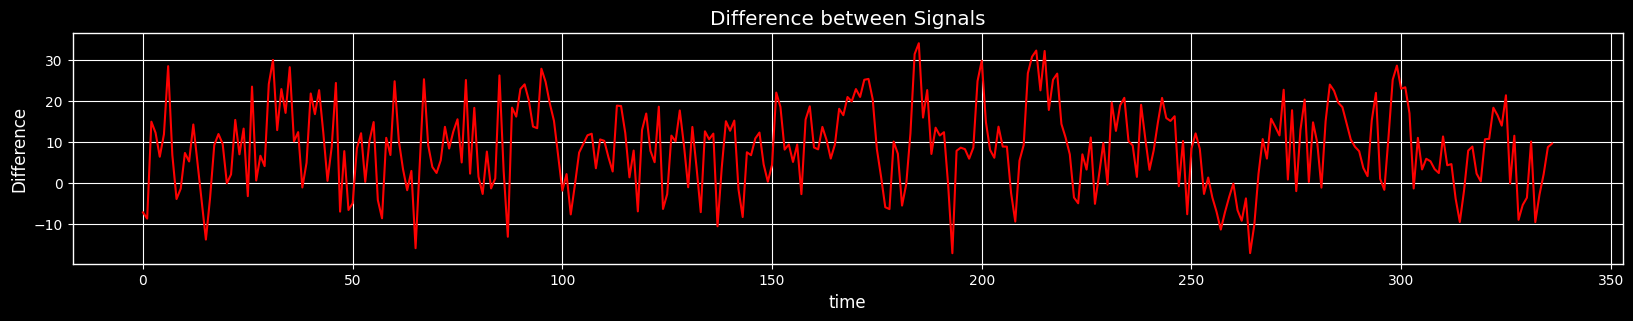

In [110]:
#Difference of the Signal between stressed and baseline
Baseline_vs_stressed = baselinesignal - stressedsignal

plt.figure(figsize=(20,3))
plt.plot(Baseline_vs_stressed,label='Baseline',color='red')
plt.xlabel('time')
plt.ylabel('Difference')
plt.title('Difference between Signals')
plt.show()

### **Apply Filters to Signal Differece**

In [111]:
from scipy.signal import lfilter, lfilter_zi, filtfilt, butter

b,a = butter(3,0.05)

zi = lfilter_zi(b,a) 
z,_ = lfilter(b,a,Baseline_vs_stressed,zi=zi*Baseline_vs_stressed[0])
z2,_ = lfilter(b,a,z,zi=zi*z[0])
y = filtfilt(b,a,Baseline_vs_stressed)

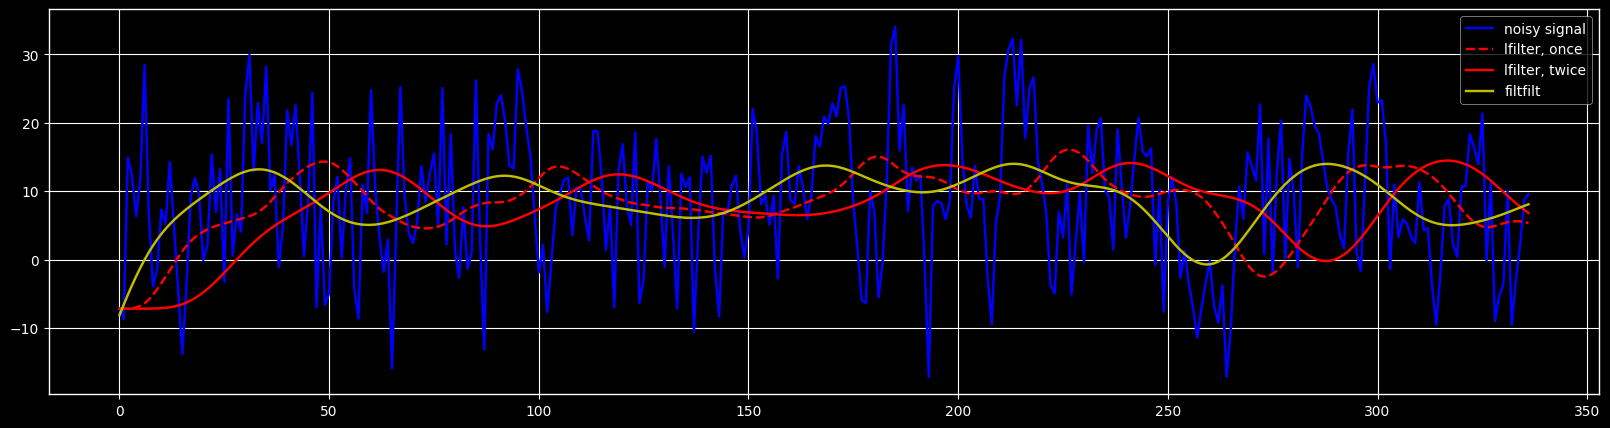

In [112]:
plt.figure(figsize=(20,5))
plt.plot(Baseline_vs_stressed,'b',label='noisy signal',linewidth=1.75)
plt.plot(z,'r--',label='lfilter',linewidth=1.75)
plt.plot(z2,'r',label='lfilter x2',linewidth=1.75)
plt.plot(y,'y',label='filtfilt',linewidth=1.75)

plt.legend(('noisy signal','lfilter, once','lfilter, twice','filtfilt'),loc='best')
plt.show()

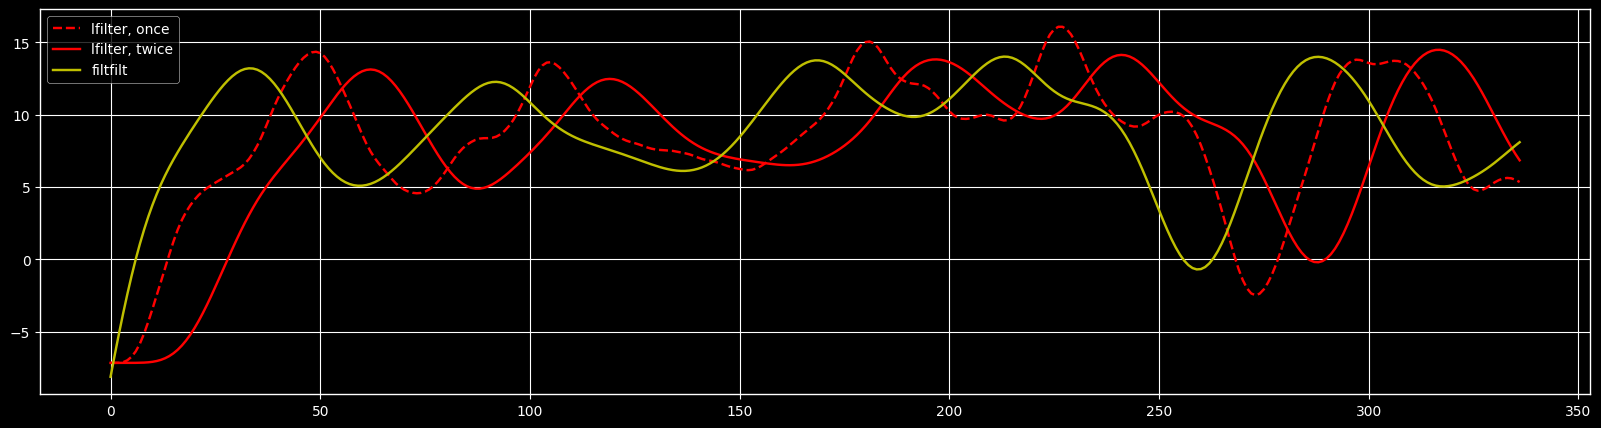

In [113]:
plt.figure(figsize=(20,5))
plt.plot(z,'r--',label='lfilter',linewidth=1.75)
plt.plot(z2,'r',label='lfilter x2',linewidth=1.75)
plt.plot(y,'y',label='filtfilt',linewidth=1.75)

plt.legend(('lfilter, once','lfilter, twice','filtfilt'),loc='best')

plt.show()

### **Discrete Fourier Transform**

In [114]:
import math
from matplotlib import style

def cal_dft(sig_src_arr):
    
    sig_dest_imx_arr = [0.0] * int(len(sig_src_arr) / 2)
    sig_dest_rex_arr = [0.0] * int(len(sig_src_arr) / 2)


    for j in range(int(len(sig_src_arr)/2)):
        sig_dest_imx_arr[j] = 0
        sig_dest_imx_arr[j] = 0

    for k in range(int(len(sig_src_arr)/2)):
        for i in range(len(sig_src_arr)):
            sig_dest_rex_arr[k] = sig_dest_rex_arr[k] + sig_src_arr[i]*math.cos(2*math.pi*k*i/len(sig_src_arr))
            sig_dest_imx_arr[k] = sig_dest_imx_arr[k] - sig_src_arr[i]*math.sin(2*math.pi*k*i/len(sig_src_arr))



    style.use('ggplot')
    style.use('dark_background')
    f , pltr_arr_1 = plt.subplots(3, sharex=True,figsize=(50, 15))
    f.suptitle("DFT")

    pltr_arr_1[0].plot(sig_src_arr, color='yellow',linewidth=4.0)
    pltr_arr_1[0].set_title('Input Signal', color='yellow',fontsize=50)

    pltr_arr_1[1].plot(sig_dest_rex_arr, color='green',linewidth=5.0)
    pltr_arr_1[1].set_title('Frequency domain (real)', color='green',fontsize=50)

    pltr_arr_1[2].plot(sig_dest_imx_arr, color='red',linewidth=5.0)
    pltr_arr_1[2].set_title('Frequency domain (imaginery)', color='red',fontsize=50)

    plt.show()

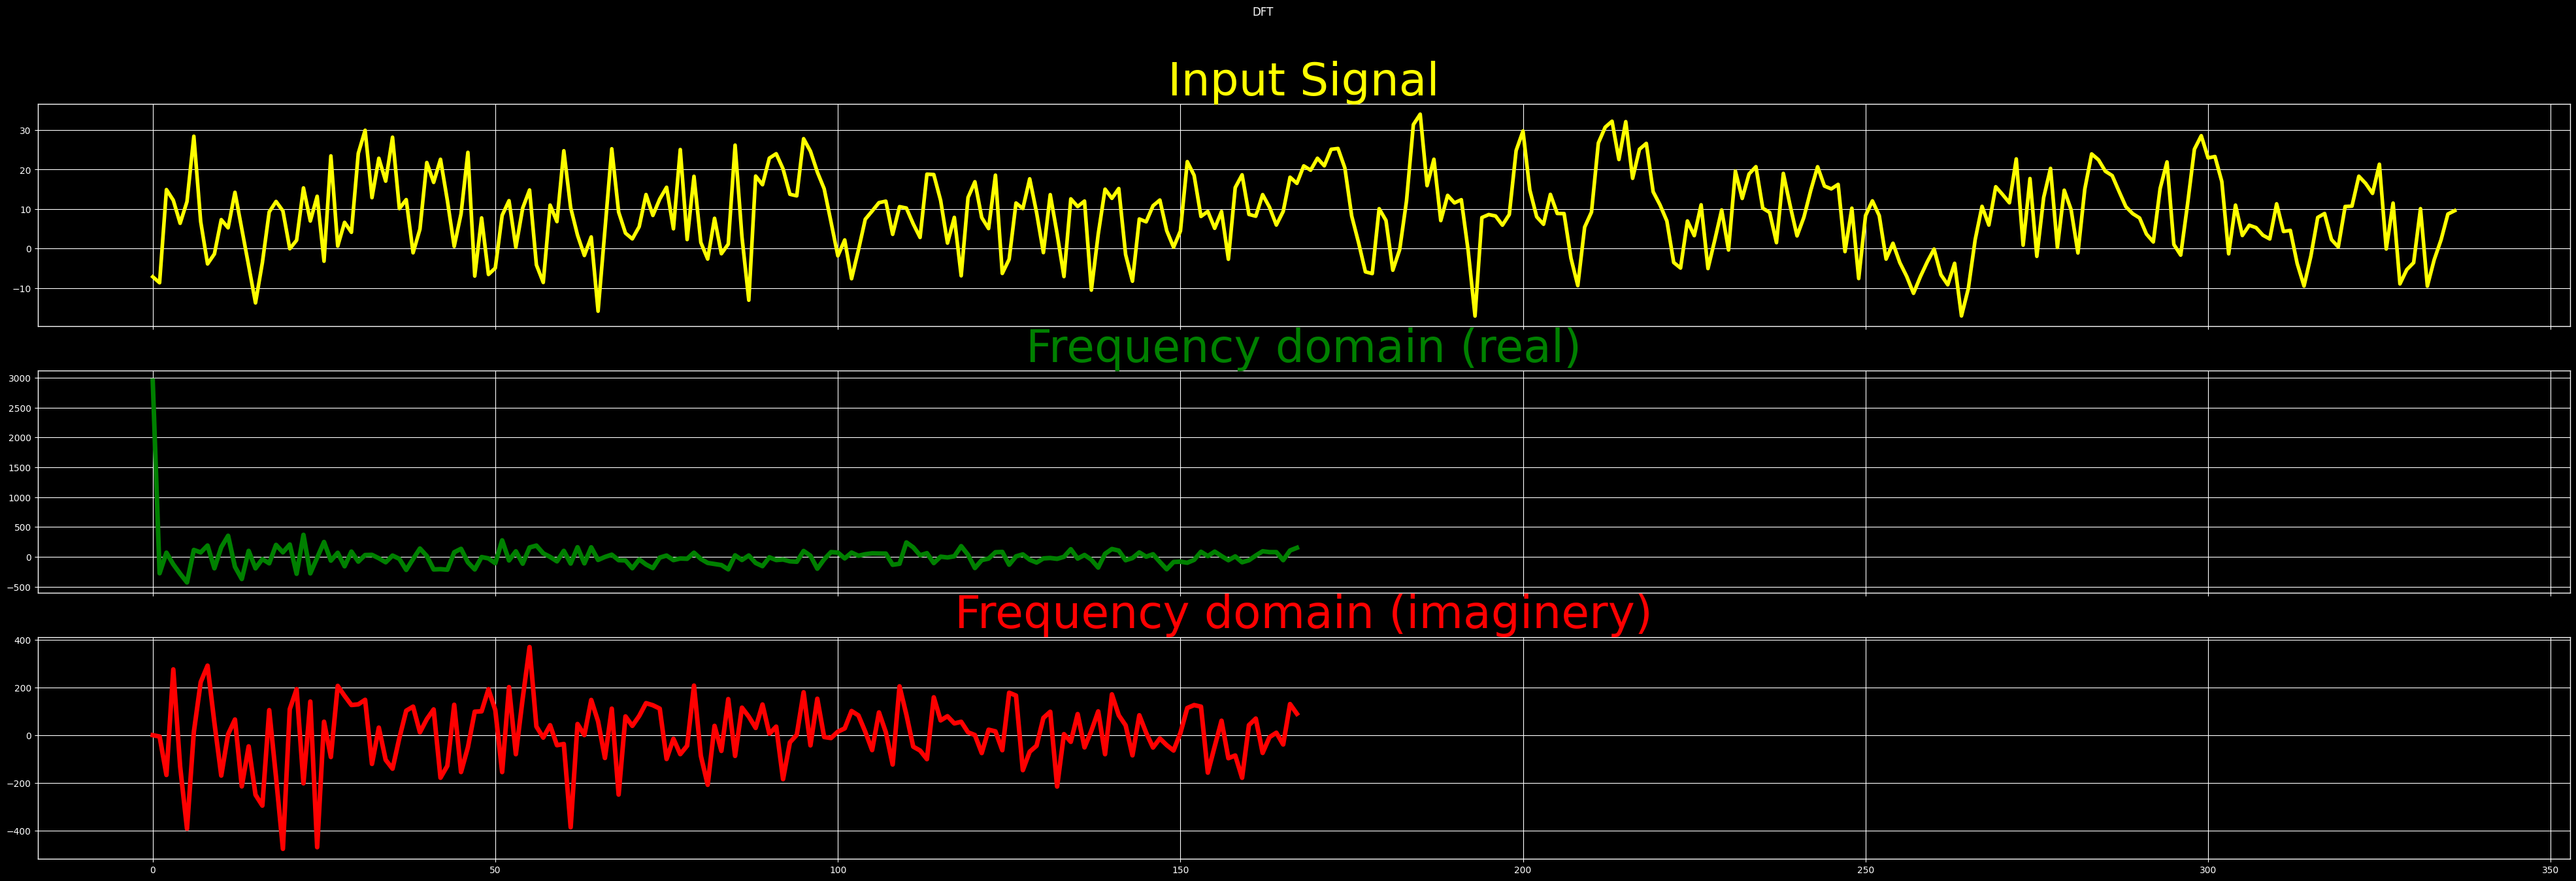

In [115]:
cal_dft(Baseline_vs_stressed)

In [116]:
def cal_dft_mgt(sig_src_arr):
    sig_dest_imx_arr = [0.0] * int(len(sig_src_arr) / 2)
    sig_dest_rex_arr = [0.0] * int(len(sig_src_arr) / 2)
    
    for k in range(int(len(sig_src_arr) / 2)):
        for i in range(len(sig_src_arr)):
            sig_dest_rex_arr[k] += sig_src_arr[i] * math.cos(2 * math.pi * k * i / len(sig_src_arr))
            sig_dest_imx_arr[k] -= sig_src_arr[i] * math.sin(2 * math.pi * k * i / len(sig_src_arr))
    
    sig_dest_mag_arr = np.sqrt(np.power(sig_dest_rex_arr, 2) + np.power(sig_dest_imx_arr, 2))

    style.use('ggplot')
    style.use('dark_background')
    f, pltr_arr_1 = plt.subplots(2, sharex=True, figsize=(50, 15))

    pltr_arr_1[0].plot(sig_src_arr, color='yellow', linewidth=4)
    pltr_arr_1[0].set_title('Input Signal', color='yellow',fontsize=50)

    pltr_arr_1[1].plot(sig_dest_mag_arr, color='blue', linewidth=4)
    pltr_arr_1[1].set_title('Frequency domain (magnitude)', color='blue',fontsize=50)

    plt.show()


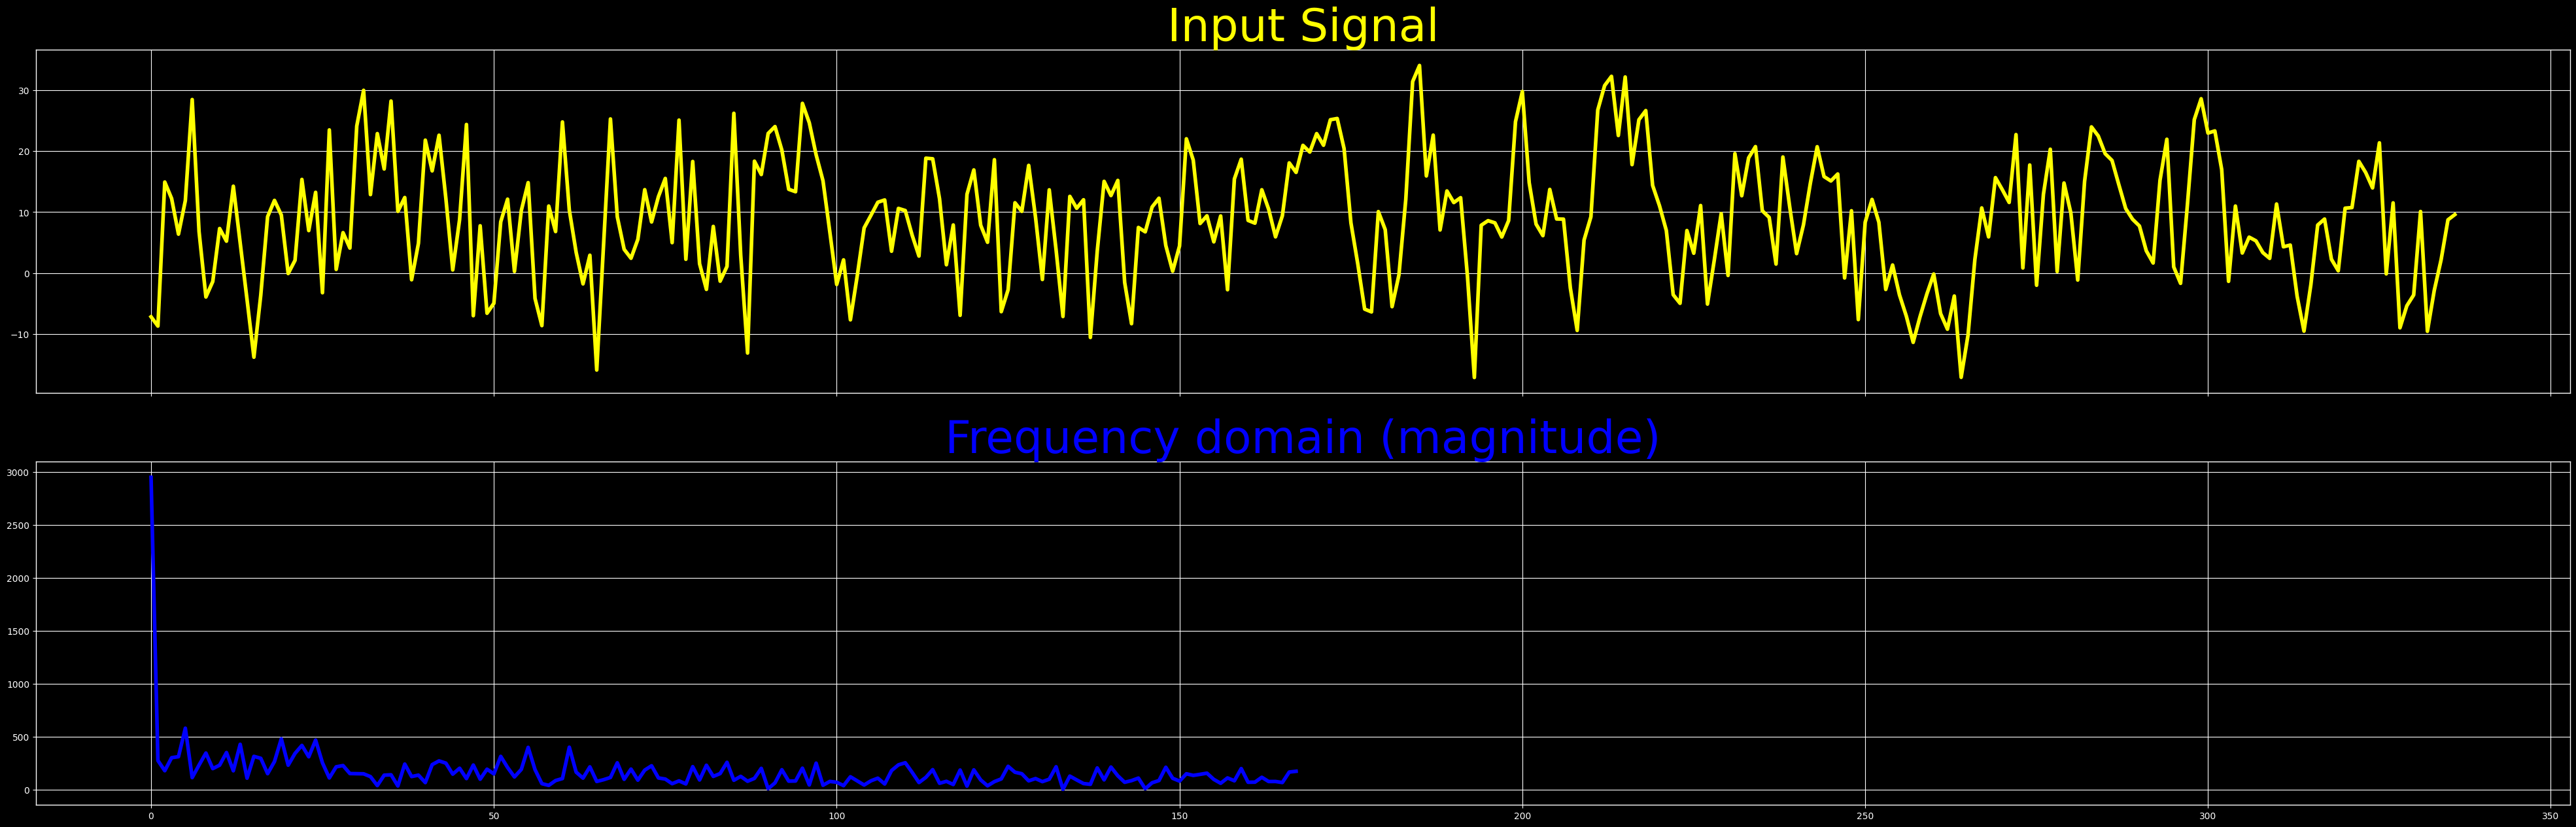

In [117]:
cal_dft_mgt(Baseline_vs_stressed)